<a href="https://colab.research.google.com/github/sovii003/dynamic-hands/blob/main/dynamic_hand_gestures_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/20bnjester.zip

In [ ]:
#alternative way of downloading kaggle datasets
#upload the kaggle json api token
from google.colab import files
files.upload()

# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# !kaggle datasets download -d kamadsaxena/20bnjester

Saving kaggle.json to kaggle.json
100% 13.8G/13.9G [02:02<00:00, 195MB/s]
100% 13.9G/13.9G [02:02<00:00, 121MB/s]


In [ ]:
!unzip -qq /content/20bnjester.zip

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16606201943086905092
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14465892352
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7054429014691681859
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
import os
import math
import pandas as pd
import matplotlib.image as img
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras


In [ ]:
tf.__version__

'2.8.2'

In [ ]:
# return gray image
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [ ]:
# training targets, you can use your custome csv file if you already created it with "training-sample.py"
df = pd.read_csv('/content/drive/MyDrive/Deep learning/Train.csv',header=None,sep = ",").to_dict()
# targets[16243]
# validation targets, you can use your custome csv file if you already created it with "validation-sample.py"
df_validation = pd.read_csv('/content/drive/MyDrive/Deep learning/Validation.csv',header=None,sep = ",").to_dict()
# targets_validation[2238]

In [ ]:
for i in range(1,len(df[0])):
  df[0][i] = int(df[0][i])

In [ ]:
import os, shutil, pathlib

direc = pathlib('/content/20BN-JESTER/Train')


In [ ]:
targets = {}
targets_locs = {}
targets_validation = {}
targets_validation_locs = {}
for i in range(1,len(df[0])):
  targets[i-1] = (df[1][i])
  targets_locs[i-1] = int(df[0][i])
for i in range(1,len(df_validation[0])):
  targets_validation[i-1] = (df_validation[1][i])
  targets_validation_locs[i-1] = int(df_validation[0][i])

In [ ]:
print(targets_locs[1]," No. folder performs: ",targets[1])
# print(targets_locs)

3  No. folder performs:  Pushing Two Fingers Away


In [ ]:
print(len(targets))
# targets

50420


In [ ]:
label = pd.read_csv('/content/Labels.csv',header=None, usecols=[0])
label.head()
targets_name = label[0].tolist()
len(targets_name)
print(label)

                                0
0              Doing other things
1                Drumming Fingers
2                      No gesture
3                 Pulling Hand In
4          Pulling Two Fingers In
5               Pushing Hand Away
6        Pushing Two Fingers Away
7           Rolling Hand Backward
8            Rolling Hand Forward
9                    Shaking Hand
10       Sliding Two Fingers Down
11       Sliding Two Fingers Left
12      Sliding Two Fingers Right
13         Sliding Two Fingers Up
14                      Stop Sign
15                   Swiping Down
16                   Swiping Left
17                  Swiping Right
18                     Swiping Up
19                     Thumb Down
20                       Thumb Up
21         Turning Hand Clockwise
22  Turning Hand Counterclockwise
23      Zooming In With Full Hand
24    Zooming In With Two Fingers
25     Zooming Out With Full Hand
26   Zooming Out With Two Fingers


In [ ]:
# classes label you want to use all labels 
'''label = pd.read_csv('data_csv/labels.csv',header=None, usecols=[0])
label.head()
targets_name = label[0].tolist()
len(targets_name)'''

# The classes (labels) we want to use
targets_name = [
    "Swiping Right",
    "Swiping Left",
    "Sliding Two Fingers Right",
    "Sliding Two Fingers Left",
    "Zooming Out With Two Fingers",
    "Zooming Out With Two Fingers",
    "No gesture",
    "Thumb Up",
    "Stop Sign"
    ]

In [ ]:
# Get the data directories
path = "/content/20BN-JESTER/Train/"
path_cv = "/content/20BN-JESTER/Validation/"

dirs = os.listdir(path)
dirs_cv = os.listdir(path_cv)

In [ ]:
# number of samples for training and validation
print(len(dirs))
print(len(dirs_cv))

50420
7047


In [ ]:
final_train = {}
final_train_locs = {}
final_test = {}
final_test_locs = {}
counter=0
for i in range(0,len(targets)):
  if(targets[i] in targets_name):
    final_train[counter] = targets[i]
    final_train_locs[counter] = targets_locs[i]
    counter+=1
counter=0
for i in range(0,len(targets_validation)):
  if(targets_validation[i] in targets_name):
    final_test[counter] = targets_validation[i]
    final_test_locs[counter] = targets_validation_locs[i]
    counter+=1

In [ ]:
for i in range(10):
  print(final_train_locs[i]," folder is labelled: ",final_train[i])

31  folder is labelled:  Stop Sign
37  folder is labelled:  Zooming Out With Two Fingers
50  folder is labelled:  No gesture
51  folder is labelled:  Swiping Right
58  folder is labelled:  Zooming Out With Two Fingers
59  folder is labelled:  Stop Sign
70  folder is labelled:  No gesture
95  folder is labelled:  Swiping Right
100  folder is labelled:  Swiping Right
107  folder is labelled:  Swiping Left


In [ ]:
print(len(final_train),",",len(final_test))

14441 , 1980


In [ ]:
training_count = 10


In [ ]:
'''
The videos do not have the same number of frames, here we try to unify.
'''
hm_frames = 30 # number of frames
# unify number of frames for each training
def get_unify_frames(path):
    offset = 0
    # pick frames
    frames = os.listdir(path)
    frames_count = len(frames)
    # unify number of frames 
    if hm_frames > frames_count:
        # duplicate last frame if video is shorter than necessary
        frames += [frames[-1]] * (hm_frames - frames_count)
    elif hm_frames < frames_count:
        # If there are more frames, then sample starting offset
        #diff = (frames_count - hm_frames)
        #offset = diff-1 
        frames = frames[0:hm_frames]
    return frames  

In [ ]:
# Resize frames
def resize_frame(frame):
    frame = img.imread(frame)
    frame = cv2.resize(frame, (64, 64))
    return frame
    

In [ ]:
dirs = []
dirs_cv = []
dirs = (final_train_locs)
dirs_cv = (final_test_locs)

In [ ]:
len(dirs_cv)

1980

In [ ]:
for i in range(0,2000):
  print(dirs[i])

In [ ]:
# Function to empty the RAM
def release_list(a):
   del a[:]
   del a

In [ ]:
def train_data_prep(ini,k):
  # Adjust training data
  counter_training = 0 # number of training
  training_targets = [] # training targets 
  new_frames = [] # training data after resize & unify
  for i in range(len(dirs)*ini//k,len(dirs)*(ini+1)//k):
      directory = dirs[i]
      new_frame = [] # one training
      # Frames in each folder
      frames = get_unify_frames(path+str(directory))
      if len(frames) == hm_frames: # just to be sure
          for frame in frames:
              frame = resize_frame(path+str(directory)+'/'+frame)
              new_frame.append(rgb2gray(frame))
              if len(new_frame) == 15: # partition each training on two trainings.
                  new_frames.append(new_frame) # append each partition to training data
                  if(final_train[i] in targets_name):
                    training_targets.append(targets_name.index(final_train[i]))
                  counter_training +=1
                  new_frame = []
  # convert training data to np float32
  training_data = np.array(new_frames[0:counter_training], dtype=np.float32)
  release_list(new_frames)
  return training_data,training_targets

In [ ]:
def cv_data_prep(ini,k):
  # we do the same for the validation data
  counter_validation = 0
  cv_targets = []
  new_frames_cv = []
  for i in range(len(dirs_cv)*ini//k,len(dirs_cv)*(ini+1)//k):
    directory = dirs_cv[i]
    new_frame = []
    # Frames in each folder
    frames = get_unify_frames(path_cv+str(directory))
    if len(frames)==hm_frames:
        for frame in frames:
            frame = resize_frame(path_cv+str(directory)+'/'+frame)
            new_frame.append(rgb2gray(frame))
            if len(new_frame) == 15:
                new_frames_cv.append(new_frame)
                if(final_test[i] in targets_name):
                    cv_targets.append(targets_name.index(final_test[i]))
                counter_validation +=1
                new_frame = []
  # convert validation data to np float32
  cv_data = np.array(new_frames_cv[0:counter_validation], dtype=np.float32)
  release_list(new_frames_cv)
  return cv_data,cv_targets

In [ ]:
k = 7
for i in range(0,k):
  training_data, training_targets_piece = train_data_prep(i,k)
  np.save('training_data'+str(i+1), training_data)
  # release_list(training_data)
  print(training_data.shape)
  if(i==0):
    training_targets = training_targets_piece
  else:
    training_targets+=training_targets_piece
np.save('training_targets', training_targets)


(4126, 15, 64, 64)
(4126, 15, 64, 64)
(4126, 15, 64, 64)
(4126, 15, 64, 64)
(4126, 15, 64, 64)
(4126, 15, 64, 64)
(4126, 15, 64, 64)


In [ ]:
k =1
for i in range(0,k):
  cv_data, cv_targets_piece = cv_data_prep(i,k)
  np.save('cv_data'+str(i+1), cv_data)
  print(cv_data.shape)
  if(i==0):
    cv_targets = cv_targets_piece
  else:
    cv_targets+=cv_targets_piece
np.save('cv_targets',cv_targets)

(3960, 15, 64, 64)


In [ ]:
!rm -rf 20bnjester

In [ ]:
# To check training length and validation length
# print(len(new_frames))
# print(len(new_frames_cv))
print(len(training_targets))
print(len(cv_targets))

28882
3960


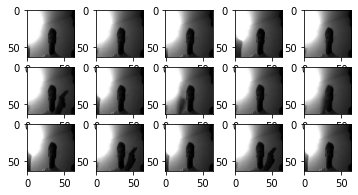

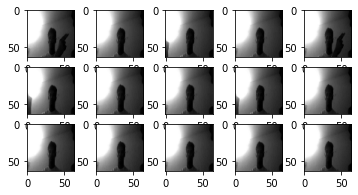

<Figure size 432x288 with 0 Axes>

In [ ]:
#show data
fig = plt.figure()
for i in range(2,4):
    for num,frame in enumerate(training_data[i][0:18]):
        y = fig.add_subplot(4,5,num+1)
        y.imshow(frame, cmap='gray')
    fig = plt.figure()
plt.show()

In [ ]:
print(training_data.shape)
cv_data.shape

(4126, 15, 64, 64)


(3960, 15, 64, 64)

In [ ]:
# Normalisation: training
k=7
for i in range(1,k+1):
  training_data = np.load('training_data'+str(i)+'.npy')
  print('For ',i,'th data array:')
  print('old mean', training_data.mean())
  scaler = StandardScaler()
  scaled_images  = scaler.fit_transform(training_data.reshape(-1, 15*64*64))
  print('new mean', scaled_images.mean())
  scaled_images  = scaled_images.reshape(-1, 15, 64, 64, 1)
  print(scaled_images.shape)
  np.save('scaled_images'+str(i),scaled_images)

In [ ]:
# Normalisation: validation
print('old mean', cv_data.mean())
scaler = StandardScaler()
scaled_images_cv  = scaler.fit_transform(cv_data.reshape(-1, 15*64*64))
print('new mean',scaled_images_cv.mean())
scaled_images_cv  = scaled_images_cv.reshape(-1, 15, 64, 64, 1)
print(scaled_images_cv.shape)
np.save('scaled_images_cv',scaled_images_cv)

In [ ]:
# My model
class Conv3DModel(tf.keras.Model):
  def __init__(self):
    super(Conv3DModel, self).__init__()
    # Convolutions
    self.conv1 = tf.compat.v2.keras.layers.Conv3D(32, (3, 3, 3), activation='relu', name="conv1", data_format='channels_last')
    self.pool1 = tf.keras.layers.MaxPool3D(pool_size=(2, 2, 2), data_format='channels_last')
    self.conv2 = tf.compat.v2.keras.layers.Conv3D(64, (3, 3, 3), activation='relu', name="conv1", data_format='channels_last')
    self.pool2 = tf.keras.layers.MaxPool3D(pool_size=(2, 2,2), data_format='channels_last')
   
    # LSTM & Flatten
    self.convLSTM =tf.keras.layers.ConvLSTM2D(40, (3, 3))
    self.flatten =  tf.keras.layers.Flatten(name="flatten")

    # Dense layers
    self.d1 = tf.keras.layers.Dense(128, activation='relu', name="d1")
    self.out = tf.keras.layers.Dense(9, activation='softmax', name="output")
    

  def call(self, x):
    x = self.conv1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.pool2(x)
    x = self.convLSTM(x)
    #x = self.pool2(x)
    #x = self.conv3(x)
    #x = self.pool3(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.out(x)

Simple Model

In [ ]:
k=7
training_targets = np.load('/content/drive/MyDrive/dynamicHandsFiles/training_targets.npy')
cv_targets = np.load('/content/drive/MyDrive/dynamicHandsFiles/cv_targets.npy')
scaled_images_cv = np.load('/content/drive/MyDrive/dynamicHandsFiles/scaled_images7.npy')
x_val = np.array(scaled_images_cv)
del scaled_images_cv
y_val = np.array(training_targets[len(training_targets)*6//7:len(training_targets)])
print(len(x_val)," : ",len(y_val))

4126  :  4126


In [ ]:
from keras.callbacks import ModelCheckpoint

# include the epoch in the file name. (uses `str.format`)
checkpoint_path = "training_today/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True)

In [ ]:
for i in range(0,k-1):
  scaled_images = np.load('/content/drive/MyDrive/dynamicHandsFiles/scaled_images'+str(i+1)+'.npy')
  x_train = np.array(scaled_images)
  y_train = np.array(training_targets[len(training_targets)*i//k:len(training_targets)*(i+1)//k])
  model = Conv3DModel()
  if(i!=0):
    # model.build(input_shape=(None,15,64,64,1))
    # model = keras.models.load_model('mymodel')
    model.load_weights('mymodel')
  # else:
  model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics = ['accuracy'])
  # To check what variables are occupying the RAM at this point//from stackoverflow
  import sys
  def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

  for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))
  # Run the training 
  history = model.fit(x_train, y_train,
                      callbacks = [cp_callback],
                      validation_data=(x_val, y_val),
                      batch_size=32,
                      epochs=4)
  del scaled_images
  # model.save('mymodel', save_format='tf')
  model.save_weights('mymodel', save_format='tf')


In [ ]:
# !unzip /content/mymodel.zip
# model = keras.models.load_model('content/mymodel')

In [ ]:
x_test = np.load('/content/drive/MyDrive/dynamicHandsFiles/scaled_images_cv.npy')
y_test = np.load('/content/drive/MyDrive/dynamicHandsFiles/cv_targets.npy')
print(model.evaluate(x_test, y_test))

124/124 [==============================] - 3s 25ms/step - loss: 1.2585 - accuracy: 0.6568
[1.258490800857544, 0.6568182110786438]


In [ ]:
!zip -r /content/mymodel.zip /content/mymodel

In [ ]:
# choose the loss and optimizer methods
# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics = ['accuracy'])

In [ ]:
# x_train = np.array(scaled_images)
# y_train = np.array(training_targets[24756:28883])
# x_val = np.array(scaled_images_cv)
# y_val = np.array(cv_targets)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(4126, 15, 64, 64, 1)
(4126,)
(3960, 15, 64, 64, 1)
(3960,)


#### here I use the checkpoints
read more:
https://www.tensorflow.org/beta/guide/checkpoints

In [ ]:
# Run the training 
history = model.fit(x_train, y_train,
                    callbacks = [cp_callback],
                    validation_data=(x_val, y_val),
                    batch_size=32,
                    epochs=10)

In [ ]:
# just after one epoch
history.history

In [ ]:
# save the model for use in the application
model.save_weights('weights/path_to_my_weights', save_format='tf')

## 2. Using custom train step function and validation step


In [ ]:
# My model
class Conv3DModel(tf.keras.Model):
  def __init__(self):
    super(Conv3DModel, self).__init__()
    # Convolutions
    self.conv1 = tf.compat.v2.keras.layers.Conv3D(32, (3, 3, 3), activation='relu', name="conv1", data_format='channels_last')
    self.pool1 = tf.keras.layers.MaxPool3D(pool_size=(2, 2, 2), data_format='channels_last')
    self.conv2 = tf.compat.v2.keras.layers.Conv3D(64, (3, 3, 3), activation='relu', name="conv1", data_format='channels_last')
    self.pool2 = tf.keras.layers.MaxPool3D(pool_size=(2, 2,2), data_format='channels_last')
   
    # LSTM & Flatten
    self.convLSTM =tf.keras.layers.ConvLSTM2D(40, (3, 3))
    self.flatten =  tf.keras.layers.Flatten(name="flatten")

    # Dense layers
    self.d1 = tf.keras.layers.Dense(128, activation='relu', name="d1")
    self.out = tf.keras.layers.Dense(9, activation='softmax', name="output")
    

  def call(self, x):
    x = self.conv1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.pool2(x)
    x = self.convLSTM(x)
    #x = self.pool2(x)
    #x = self.conv3(x)
    #x = self.pool3(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.out(x)

In [ ]:
model = Conv3DModel()

Owing to the constraint of Ram size, the following cell can be run first 6 times for the first 6 of 7 parts of the training for training and the last part for testing.
The following can be further optimised by using iterative k fold cross validation, taking k=6 and rotating the last part for cross validation everytime. The dataset used for cross validation here shall be used for tesing. One of the 7 iterations will show the most accuracy on the test set. That can be taken as the most accurate model.

In [ ]:
scaled_images = np.load('/content/drive/MyDrive/dynamicHandsFiles/scaled_images7.npy', mmap_mode='r')
training_targets = np.load('/content/drive/MyDrive/dynamicHandsFiles/training_targets.npy',mmap_mode='r')
scaled_images_cv = np.load('/content/drive/MyDrive/dynamicHandsFiles/scaled_images_cv.npy',mmap_mode='r')
cv_targets =np.load('/content/drive/MyDrive/dynamicHandsFiles/cv_targets.npy',mmap_mode='r')

In [ ]:
# use tensorflow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((scaled_images, training_targets[6*4126:7*4126]))
cv_dataset = tf.data.Dataset.from_tensor_slices((scaled_images_cv, cv_targets))

In [ ]:
model(scaled_images[0:2])

<tf.Tensor: shape=(2, 9), dtype=float32, numpy=
array([[0.11039501, 0.11269773, 0.11174081, 0.12141634, 0.10355899,
        0.11031649, 0.11128575, 0.11486369, 0.10372521],
       [0.11091357, 0.11201296, 0.11212278, 0.11998361, 0.10485978,
        0.11166513, 0.11084885, 0.11472065, 0.10287264]], dtype=float32)>

In [ ]:
model.summary()

Model: "conv3d_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv3D)              multiple                  896       
                                                                 
 max_pooling3d (MaxPooling3D  multiple                 0         
 )                                                               
                                                                 
 conv1 (Conv3D)              multiple                  55360     
                                                                 
 max_pooling3d_1 (MaxPooling  multiple                 0         
 3D)                                                             
                                                                 
 conv_lstm2d (ConvLSTM2D)    multiple                  149920    
                                                                 
 flatten (Flatten)           multiple                 

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [ ]:
# Loss
train_loss = tf.keras.metrics.Mean(name='train_loss')
valid_loss = tf.keras.metrics.Mean(name='valid_loss')
# Accuracy
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
valid_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='valid_accuracy')

In [ ]:
@tf.function
def train_step(image, targets):
    with tf.GradientTape() as tape:
        # Make a prediction on all the batch
        predictions = model(image)
        # Get the error/loss on these predictions
        loss = loss_fn(targets, predictions)
    # Compute the gradient which respect to the loss
    grads = tape.gradient(loss, model.trainable_variables)
    # Change the weights of the model
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    # The metrics are accumulate over time. You don't need to average it yourself.
    train_loss(loss)
    train_accuracy(targets, predictions)

In [ ]:
@tf.function
def valid_step(image, targets):
    predictions = model(image)
    t_loss = loss_fn(targets, predictions)
    # Set the metrics for the test
    valid_loss(t_loss)
    valid_accuracy(targets, predictions)

#### here I use the checkpoints
read more:
https://www.tensorflow.org/beta/guide/checkpoints

In [ ]:
ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer=optimizer, model=model)
manager = tf.train.CheckpointManager(ckpt, 'training_checkpoints/tf_ckpts', max_to_keep=10)
ckpt.restore(manager.latest_checkpoint)

In [ ]:
epoch = 10
batch_size = 32
b = 0
training_acc = []
validation_acc = []
for epoch in range(epoch):
    # Training set
    for images_batch, targets_batch in train_dataset.batch(batch_size):
        train_step(images_batch, targets_batch)
        template = '\r Batch {}/{}, Loss: {}, Accuracy: {}'
        print(template.format(
            b, len(training_targets), train_loss.result(), 
            train_accuracy.result()*100
        ), end="")
        b += batch_size
    # Validation set
    for images_batch, targets_batch in cv_dataset.batch(batch_size):
        valid_step(images_batch, targets_batch)

    template = '\nEpoch {}, Valid Loss: {}, Valid Accuracy: {}'
    print(template.format(
        epoch+1,
        valid_loss.result(), 
        valid_accuracy.result()*100)
    )
    training_acc.append(float(train_accuracy.result()*100))
    validation_acc.append(float(valid_accuracy.result()*100))
    ckpt.step.assign_add(1)
    save_path = manager.save()
    print("Saved checkpoint for step {}: {}".format(int(ckpt.step), save_path))
    valid_loss.reset_states()
    valid_accuracy.reset_states()
    train_accuracy.reset_states()
    train_loss.reset_states()

 Batch 4096/28882, Loss: 1.1520532369613647, Accuracy: 59.18565368652344
Epoch 1, Valid Loss: 0.9367847442626953, Valid Accuracy: 60.45454788208008
Saved checkpoint for step 82: training_checkpoints/tf_ckpts/ckpt-81
 Batch 8224/28882, Loss: 0.6681046485900879, Accuracy: 72.46727752685547
Epoch 2, Valid Loss: 0.9359727501869202, Valid Accuracy: 63.83838653564453
Saved checkpoint for step 83: training_checkpoints/tf_ckpts/ckpt-82
 Batch 12352/28882, Loss: 0.4212353229522705, Accuracy: 83.73727416992188
Epoch 3, Valid Loss: 0.956099808216095, Valid Accuracy: 64.79798126220703
Saved checkpoint for step 84: training_checkpoints/tf_ckpts/ckpt-83
 Batch 16480/28882, Loss: 0.24684520065784454, Accuracy: 91.49296569824219
Epoch 4, Valid Loss: 1.0307000875473022, Valid Accuracy: 65.12626647949219
Saved checkpoint for step 85: training_checkpoints/tf_ckpts/ckpt-84
 Batch 20608/28882, Loss: 0.13303819298744202, Accuracy: 96.12215423583984
Epoch 5, Valid Loss: 1.1714271306991577, Valid Accuracy: 64

In [ ]:
print(manager.checkpoints)

['training_checkpoints/tf_ckpts/ckpt-21', 'training_checkpoints/tf_ckpts/ckpt-22', 'training_checkpoints/tf_ckpts/ckpt-23', 'training_checkpoints/tf_ckpts/ckpt-24', 'training_checkpoints/tf_ckpts/ckpt-25', 'training_checkpoints/tf_ckpts/ckpt-26', 'training_checkpoints/tf_ckpts/ckpt-27', 'training_checkpoints/tf_ckpts/ckpt-28', 'training_checkpoints/tf_ckpts/ckpt-29', 'training_checkpoints/tf_ckpts/ckpt-30']


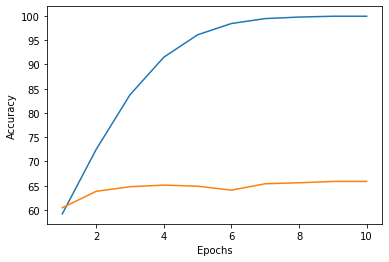

In [ ]:
# plote Accuracy / epoch
plt.plot([1,2,3,4,5,6,7,8,9,10],training_acc, '-' )
plt.plot([1,2,3,4,5,6,7,8,9,10],validation_acc, '-' )

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

In [ ]:
print(validation_acc[-1])

65.88384246826172


In [ ]:
# save the model for use in the application
model.save_weights('weights/path_to_my_weights', save_format='tf')